In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Datasets/SA Feedback Surveys_FINAL/2017/Student Feedback Surveys-Superview.csv')
df.head(10)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
5,23,Redwood City,Apps,Week 1,5,Just right
6,28,Los Angeles,Apps,Week 7,5,Just right
7,65,San Francisco,Apps,Week 1,5,A little too slow
8,101,Santa Clara,Apps,Week 1,5,A little too slow
9,124,Santa Clara,Apps,Week 1,5,Just right


In [286]:
df.shape

(1453, 6)

In [287]:
df.columns

Index(['ID', 'Location', 'Track', 'Week', 'Rating (Num)', 'Schedule Pacing'], dtype='object')

In [288]:
df.rename(columns={'Rating (Num)':'Rating'}, inplace=True)

In [289]:
df['Rating'].value_counts()

8          392
9          384
10         376
7          177
6           59
5           35
4           13
3            8
#ERROR!      3
2            2
1            2
0            2
Name: Rating, dtype: int64

In [290]:
df = df[df['Rating'] != '#ERROR!']

In [291]:
# Store loc of Rating as integers
df_rating = df.loc[:, 'Rating'].astype(int)
df_rating

0        3
1        4
2        4
3        4
4        4
        ..
1448    10
1449     8
1450    10
1451     1
1452     8
Name: Rating, Length: 1450, dtype: int64

# Calculate NPS

In [292]:
# Categorize rating
# I assume ratings of 0 would have been ratings of 1

def categorize_rating(rating):
    
    if rating > 10 or rating < 0:
        raise ValueError('Value Out of Bounds')
        
    elif 10 >= rating >= 9:
        return 'Promoter'
    elif 8 >= rating >= 7:
        return 'Passive'
    elif rating < 7:
        return 'Detractor'

In [293]:
# create 'Category' column in df
df['Category'] = df_rating.apply(categorize_rating)
df.head(10)

,ID,Location,Track,Week,Rating,Schedule Pacing,Category
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor
5,23,Redwood City,Apps,Week 1,5,Just right,Detractor
6,28,Los Angeles,Apps,Week 7,5,Just right,Detractor
7,65,San Francisco,Apps,Week 1,5,A little too slow,Detractor
8,101,Santa Clara,Apps,Week 1,5,A little too slow,Detractor
9,124,Santa Clara,Apps,Week 1,5,Just right,Detractor


In [294]:
# parse categories, calculate NPS

def calculate_nps(categories):
    promoters = categories.value_counts()['Promoter']
    passives = categories.value_counts()['Passive']
    detractors = categories.value_counts()['Detractor']
    return (promoters - detractors) / (promoters+passives+detractors)*100

f"NPS: {calculate_nps(df['Category'])}"

'NPS: 44.06896551724138'

# Diving into the data
How many more promoters are there than detractors across our 2017 data?
Which track boasts the best promoter-to-detractor ratio?
Does the student experience get better the longer that they are enrolled at the Summer Academy?
Does student satisfaction vary by location?
What are things we could find here that could “help the business”?
What sorts of information does this dataset contain?
What kinds of questions might we be able to answer with this data?
What kinds of questions can’t we answer with this data?
What sorts of information might be actionable?
How can you present your findings in a way that non-technical employees can understand and use to make decisions?

## Question 1: How many more promoters are there than detractors across our 2017 data?

In [295]:
BINS = [-np.inf, 0.00, np.inf]
LABELS = ["Promoter", "Passive", "Detractor"]
colors = ['Green', 'Yellowgreen', 'pink']

In [296]:
cat_df = df["Category"].value_counts()

(-1.1089888454347638,
 1.1224835377140603,
 -1.1146208968133489,
 1.2018786623859277)

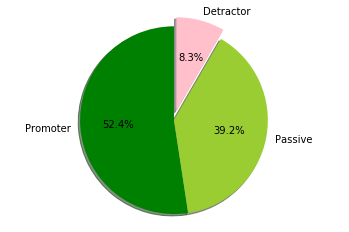

In [297]:
explode = (0, 0, 0.1)
plt.pie(cat_df.values, labels=LABELS, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, explode = explode)

fig = plt.gcf()

plt.axis('equal')

In [298]:
df['Category'].value_counts()

Promoter     760
Passive      569
Detractor    121
Name: Category, dtype: int64

In [299]:
f"There were {760 - 121} more Promoters than Detractors in 2017"

'There were 639 more Promoters than Detractors in 2017'

## Question 2: Which track boasts the best promoter-to-detractor ratio?

In [300]:
df['Track'].value_counts()

Apps               871
Apps, Explorer     224
Games              208
VR                  60
Games, Explorer     43
Name: Track, dtype: int64

In [301]:
pd.crosstab(df['Track'], df['Category'])

Category,Detractor,Passive,Promoter
Track,,,
Apps,78,355,438
"Apps, Explorer",24,109,91
Games,9,66,133
"Games, Explorer",0,12,31
VR,2,12,46


Text(0.5, 1, 'Correlation between Track and Category')

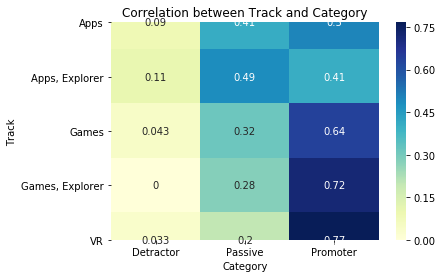

In [302]:
m = sns.heatmap(pd.crosstab(df['Track'], df['Category'], normalize='index'), cmap="YlGnBu", annot=True)
plt.title('Correlation between Track and Category')

#### Darkest value represents highest percentage of people in that Category relative to their Track. VR Track wins with 77% Promoters and only 3% Detractors.


## Question 3: Does the student experience get better the longer that they are enrolled at the Summer Academy? 

In [303]:
pd.crosstab(df['Week'], df['Rating'])

Rating,0,1,10,2,3,4,5,6,7,8,9
Week,,,,,,,,,,,
Week 1,0,0,68,0,1,6,9,12,40,91,61
Week 2,1,0,61,0,2,2,6,12,34,82,76
Week 3,0,1,66,0,1,0,5,13,22,64,69
Week 4,0,0,45,0,2,3,6,8,25,49,55
Week 5,1,0,52,1,0,2,4,7,22,45,45
Week 6,0,0,43,1,1,0,1,5,18,41,34
Week 7,0,1,37,0,1,0,4,2,15,19,41
Week 8,0,0,4,0,0,0,0,0,1,1,3


In [304]:
# dot map
# calculate NPS for each week and add to new column
# df.groupby('Week')['Rating'].value_counts()


Series([], Name: Track, dtype: float64)

## Question 4: Does student satisfaction vary by location?